<a href="https://colab.research.google.com/github/Lucasllops/Airbnb-Rio_de_Janeiro/blob/main/Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise dos dados de hospedaria da empresa Airbnb para a cidade do Rio de Janeiro

A [Airbnb](https://www.airbnb.com.br/) é uma empresa americana fundada em agosto de 2008, que mudou a forma de se trabalhar com hospedarias, isso porque a empresa é uma das maiores no ramo de hospedagem, mesmo não possuindo nenhum imóvel. 

Com a Airbnb, pessoas do mundo inteiro podem de forma fácil, alugar casas ou quartos para se hospedarem durante aquela viagem de férias. 

A empresa opera online, e faz o papel de intermediaria entre pessoas que possuem imóveis ou quartos para alugar, e pessoas que querem alugar um lugar para passar o fim de semana ou uma temporada.

**Esse notebook tem como objetivo a análise dos dados de hospedaria para a cidade do Rio de Janeiro, e ver quais insights podem ser extraídos.**

## Obtenção dos dados

Todos os dados utilizados neste notebook foram retirados do site [inside Airbnb](http://insideairbnb.com/get-the-data).

Nessa análise o aquivo usado será o informado abaixo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro*



In [2]:
#impota-se as bibliotecas que serão usadas.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#importar o arquivo que será utilizado

df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2022-03-25/visualisations/listings.csv')

## Análise dos dados

Aqui tentaremos inicialmente entender como os dados estão estruturados, se os dados são integros, com quantas variaveis vamos trabalhar, e se todas são significativas. Criaremos visualizações para tentar entender como os dados se comportam e faremos algumas transformações se necessário. Por fim tentarei extrair insigths desses dados.

### Dicionário das variáveis

* `id` - Código identificador do imóvel
* `name` - Nome do imóvel como anunciado no site
* `host_id` - Código identificador do proprietário do imóvel
* `host_name` - Nome do proprietário do imóvel
* `neighbourhood_group` - Coluna com todos os valores nulos
* `neighbourhood` - Bairro onde está localizado o imóvel
* `latitude` - Coordenada geográfica latitudinal do imóvel
* `longitude` - Coordenada geográfica longitudinal do imóvel
* `room_type` - Tipo de locação, se todo o imóvel ou apenas um quarto
* `price` - Preço do aluguel
* `minimum_nights` - Minimo de noites para se fazer a reserva
* `number_of_reviews` - Número de reviews para o imóvel
* `last_review` - Último review feito para o imóvel
* `reviews_per_month` - Quantidade de reviews feitos por mês
* `calculated_host_listings_count` - Quantidade de imóveis anunciados pelo proprietário
* `availability_365` - Disponibilidade dos imóveis
* `number_of_reviews_ltm` - Número de reviews do mês anterior
* `license` - Coluna com todo os dados nulos

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,581017381015650161,Que tal matar as saudades do carnaval no Rio?,424872017,Maria Jose Franco,NaN,Urca,-22.947812,-43.175590,Entire home/apt,1600,1,0,NaN,NaN,2,365,0,NaN
1,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.965990,-43.179400,Entire home/apt,254,5,269,2022-03-24,1.89,1,307,9,NaN
2,53344884,Suntuoso apartamento em Copacabana posto 6,431412286,Carlos Henrique,NaN,Copacabana,-22.982990,-43.189040,Entire home/apt,2500,3,0,NaN,NaN,9,365,0,NaN
3,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.984050,-43.201890,Entire home/apt,607,3,85,2018-02-14,0.61,1,194,0,NaN
4,558164148245438468,Apartamento frontal mar decorado por arquiteto,437903860,Lianna,NaN,Barra da Tijuca,-23.014541,-43.316481,Entire home/apt,1857,1,0,NaN,NaN,1,365,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
#Usando shape para saber quantas linhas e quantas colunas o df possui.
print('Número de entradas (linhas): \t', df.shape[0])
print('Número de variáveis (colunas): \t', df.shape[1], '\n')

#Usando dtypes para saber os tipos de cada variável (coluna)
print(df.dtypes)

Número de entradas (linhas): 	 24722
Número de variáveis (colunas): 	 18 

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Para saber se os dados são confiaveis e a qualidade desses dados, precisamos verificar a quantidade de valores nullos nesses dados, para isso observaremos a porcentagem de entradas nulas para cada variavel.

In [6]:
#Operação para obter a porcetagem de valores nulos no dataset
(df.isnull().sum() * 100)/df.shape[0]

id                                  0.000000
name                                0.084945
host_id                             0.000000
host_name                           0.028315
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        31.449721
reviews_per_month                  31.449721
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                           100.000000
dtype: float64

Observamos que as colunas ***license*** e ***neighbourhood_group*** estão com todas as entradas sem informações, por isso poderiamos retirar as duas do nosso dataframe, outras duas colunas com uma quantidade significativa de dados nulos são ***last_review*** e ***reviews_per_month***, para as demais a quantidade de informações faltantes não afetaram as análises.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Aqui plotaremos histogramas para as variáveis de forma que possamos observar como os valores delas estão distribuidos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faacd606890>,
      dtype=object)

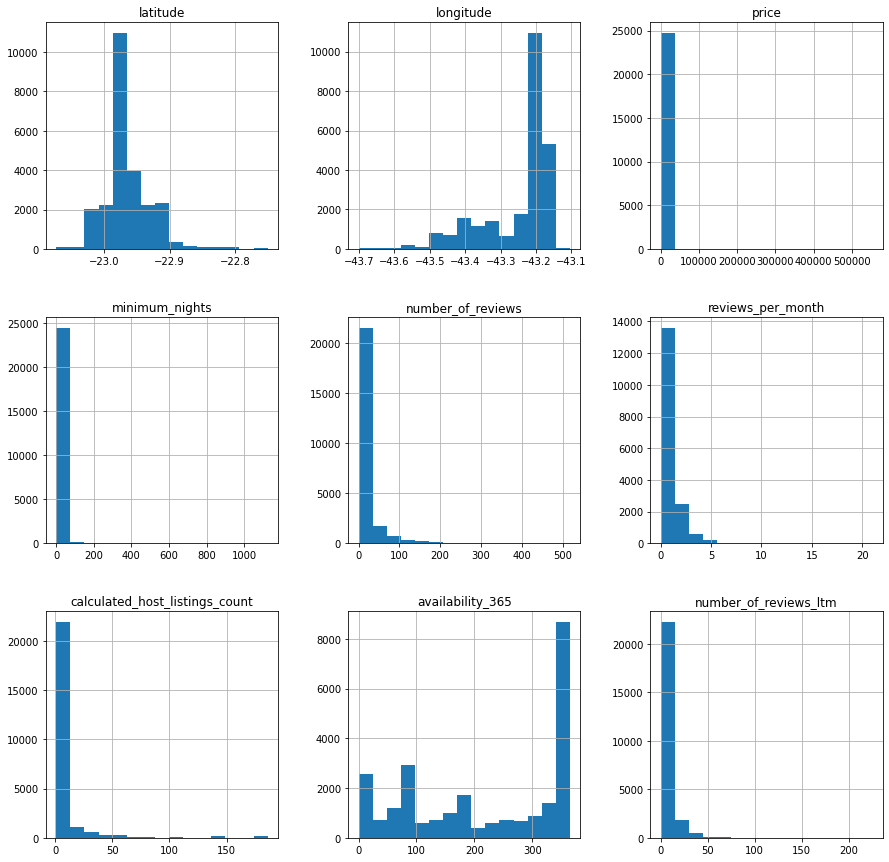

In [7]:
df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 
        'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].hist(bins = 15, figsize = (15, 15))

Para melhor praticidade, algumas colunas foram desconsideradas na hora da plotagem dos gráficos, isso porque não seria interessante verificar as colunas que estão nulas, ou que não possuem um valor que se deseja oberservar, tais como as colunas de id.

A partir dos histogramas podemos observar que as variáveis não são simetricas, e tambem observamos que em quase todas as colunas existem valores muito altos que parecem distorcer a distribuição (*outliers*).

### **Q4. Há *outliers* presentes?**

Como visto nos gráficos acima, é possivel observar outliers presentes nos dados, para uma melhor visualização desses valores podemos plotar ***boxplots*** e observar os resumos estatísticos tais como média, mediana, desvio padrão, etc.

In [12]:
#obtendos a descrição estatística dos dados
df[['price', 'minimum_nights', 'number_of_reviews', 'last_review', 
        'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,24722.000000,24722.000000,24722.000000,16947.000000,24722.000000,24722.000000,24722.000000
mean,717.395923,5.256978,15.781126,0.824122,7.843297,219.635183,4.452916
std,4174.808259,25.701926,35.410457,1.018939,22.580404,134.127986,8.895529
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,180.000000,1.000000,0.000000,0.130000,1.000000,88.000000,0.000000
50%,300.000000,3.000000,3.000000,0.450000,1.000000,242.000000,1.000000
75%,600.000000,4.000000,13.000000,1.110000,4.000000,360.000000,5.000000
max,552982.000000,1125.000000,518.000000,20.980000,186.000000,365.000000,225.000000


Podemos perceber valores bem altos para algumas variáveis, por exemplo a variável **price** possui um valor maximo de **552.982**, um valor muito alem da *mediana* obtida, alem disso, tal valor faz com que a média se torne uma medida não muito confiavel, por isso neste caso é melhor usar a mediana para qualquer observação.

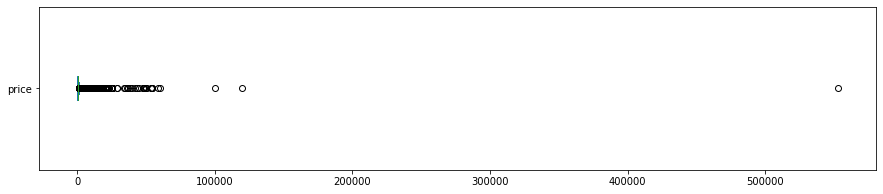

In [32]:
#boxplot da coluna price
df['price'].plot(kind='box', vert=False, figsize=(15, 3))



Número de valores maiores que 2000: 	 1140 




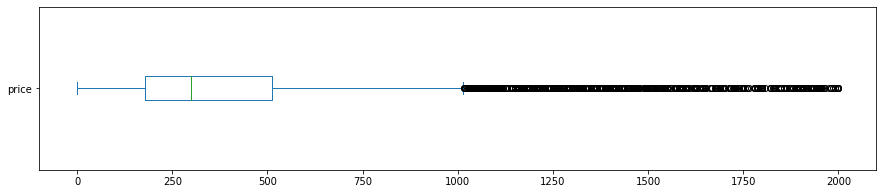

In [43]:
df['price'].loc[lambda x: x < 2000].plot(kind='box', vert=False, figsize=(15,3))
print('\n\nNúmero de valores maiores que 2000: \t', df['price'].loc[lambda x: x > 2000].count(), '\n\n')

Com o ploxplot fica fácil ver que existem muitos outliers para a variável price, no primeiro gráfico por conta da quantidade de outliers fica difícil ver a distribição dos demais valores, por isso usei um valor de corte de 2000 para que melhorasse a visualização.

Podemos ver que existem **1140** valores que são maiores que 2000, a unidade de medida da variável deve ser observada, mas provavelmente é em R$. 

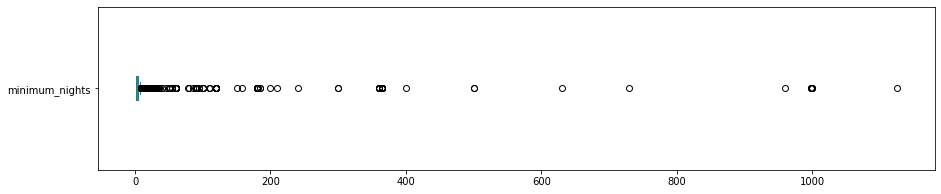

In [44]:
#boxplot da variável minimum_nights
df['minimum_nights'].plot(kind='box', vert=False, figsize=(15, 3))



Número de valores maiores que 30: 	 253 




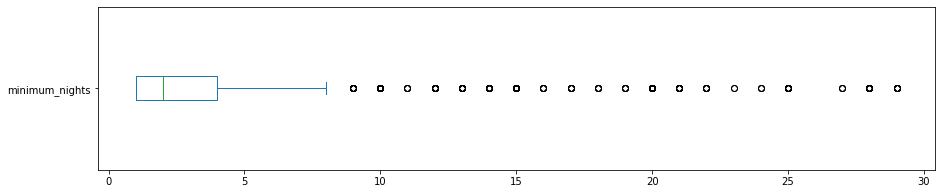

In [47]:
df['minimum_nights'].loc[lambda x: x < 30].plot(kind='box', vert=False, figsize=(15,3))
print('\n\nNúmero de valores maiores que 30: \t', df['minimum_nights'].loc[lambda x: x > 30].count(), '\n\n')

Plotamos o gráfico de minimum_nights e assim como com price, a existência de muitos outliers prejudicam a visualização do boxplot, por isso usei um valor de corte de 30 noites no segundo gráfico. 

podemos ver tambem que existem **253** valores maiores que 30 noites.

**Histograma sem os outliers**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faac6e43ed0>,
      dtype=object)

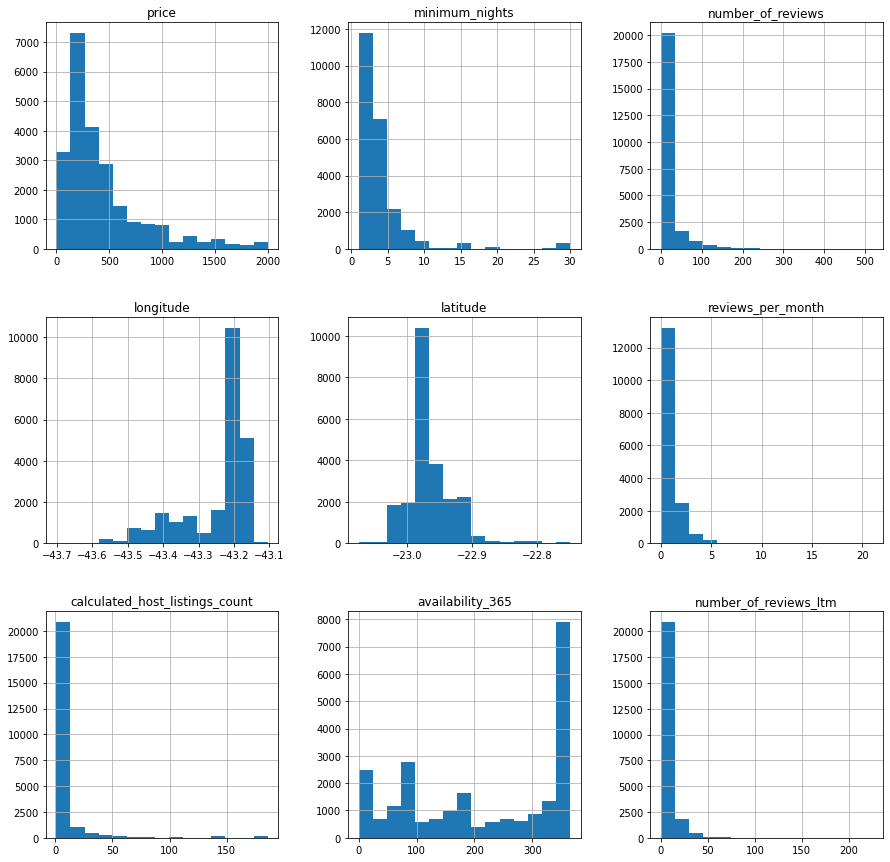

In [88]:
df_clean = df[['price', 'minimum_nights', 'number_of_reviews', 'last_review', 'longitude', 'latitude',
               'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].copy()
df_clean.drop(df_clean[df_clean.price > 2000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.hist(bins=15, figsize=(15,15))

Vamos tentar entender um pouco do que pode ter causado os outliers.

In [124]:
df[df['price'] > 2000].groupby(['neighbourhood'], sort=False).price.mean().sort_values(ascending=False)[:15]

neighbourhood
São Cristóvão         186146.333333
Gardênia Azul          60189.000000
Cachambi               21711.000000
Barra de Guaratiba     17864.666667
Tijuca                 16470.888889
Centro                 14384.600000
Vila Isabel            14187.400000
Bangu                  10000.000000
Andaraí                 9559.000000
Santa Teresa            8733.388889
Taquara                 8710.500000
Glória                  8595.363636
Copacabana              8564.038251
Humaitá                 8551.500000
Jardim Botânico         8425.266667
Name: price, dtype: float64

Primeiro verificamos se o valor de preço dos imóvel pode estar relacionado a localização do mesmo, por isso separamos os bairros pela media de preço do imóvel.

Bairros como Copacabana, Jardim Botânico, Humaitá e Tijuca, podem ser considerados bairros nobres, cujo custo de vida é mais alto e consequentimente o valor é mais caro, mas como explicar valores como os de São Cristóvão e Bangu, que podem não ser bem vistos como os bairros citados anteriormente? 
Para isso vamos verificar cada entrada desses bairros.

In [136]:
print(df[df['neighbourhood'] == 'Bangu'].shape)
df[df['neighbourhood'] == 'Bangu'].sort_values(by='price', ascending=False)[:6]

(11, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
20899,53160102,Apt em Bangú,233479226,Cintia,NaN,Bangu,-22.88619,-43.47248,Entire home/apt,10000,30,0,NaN,NaN,1,365,0,NaN
709,1727439,Beautiful Beach House near Angra,9103300,Almir,NaN,Bangu,-22.86318,-43.51179,Entire home/apt,1587,5,0,NaN,NaN,2,365,0,NaN
713,1428202,big house with private pool for wor,5451193,Valquiria,NaN,Bangu,-22.87876,-43.45692,Entire home/apt,756,1,5,2020-09-07,0.07,1,363,0,NaN
18491,48153260,Condo Eliza 104,9270905,Carlos,NaN,Bangu,-22.85472,-43.48249,Entire home/apt,386,3,0,NaN,NaN,27,365,0,NaN
19992,52055517,Apartamento encantador com ótimas acomodações ...,421420448,Vinicius,NaN,Bangu,-22.86610,-43.45678,Entire home/apt,189,1,3,2022-01-07,0.83,1,365,3,NaN
6585,13864466,Alugo quarto para o período das Parolimpíadas,81949383,Pituka,NaN,Bangu,-22.85373,-43.45756,Private room,165,7,0,NaN,NaN,2,363,0,NaN


No caso de **Bangu**, podemos observar que uma das entradas tem o valor de **10000** para a variável price, mas tem uma quantidade minima de noites de **30**, o que pode explicar o valor.

In [135]:
print(df[df['neighbourhood'] == 'São Cristóvão'].shape)
df[df['neighbourhood'] == 'São Cristóvão'].sort_values(by='price', ascending=False)[:6]

(79, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
6593,13879989,Temporary rentals for Brazilian Cup.,82046629,Elizabeth,NaN,São Cristóvão,-22.89993,-43.23033,Shared room,552982,6,0,NaN,NaN,1,365,0,NaN
2037,2962403,Apartment near Maracanã and Subway,15092465,Flavia,NaN,São Cristóvão,-22.90721,-43.21902,Private room,2900,1,2,2014-06-29,0.02,1,365,0,NaN
1906,2693631,Apartamento Copa 2014 Fifa Maracana,13785748,Fausto,NaN,São Cristóvão,-22.90561,-43.22026,Entire home/apt,2557,20,0,NaN,NaN,1,365,0,NaN
2199,3026731,Apartment near the Maracana stadium,15051255,Marcelo,NaN,São Cristóvão,-22.90470,-43.21950,Entire home/apt,1206,15,0,NaN,NaN,1,365,0,NaN
14031,39210039,Apto dos Sonhos - Segurança Total - Perto de Tudo,300882386,Neide,NaN,São Cristóvão,-22.90489,-43.22119,Entire home/apt,800,4,2,2020-02-26,0.07,1,0,0,NaN
6153,13430591,Near the Stadium Maracanã/In front of Quinta Park,14297293,Gabriele,NaN,São Cristóvão,-22.90345,-43.22221,Entire home/apt,719,6,0,NaN,NaN,1,365,0,NaN


Para São Cristóvão vemos um valor de 552982, que muito provavelmente foi um erro, ainda mais se vermos que o tipo do imóvel é um quarto compartilhado e a duração minima é de apenas 6 noites.

### **Q5. Qual a relação entre os dados?**

In [96]:
#podemos mostrar a correlação por meio de corr()
df_clean.corr()

,price,minimum_nights,number_of_reviews,longitude,latitude,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.118337,-0.163200,-0.105804,-0.198358,-0.148907,0.083354,0.129977,-0.183048
minimum_nights,0.118337,1.000000,-0.075530,-0.030282,-0.029363,-0.141968,-0.052714,-0.006303,-0.129025
number_of_reviews,-0.163200,-0.075530,1.000000,0.104717,-0.057444,0.469791,-0.046124,-0.136657,0.673733
longitude,-0.105804,-0.030282,0.104717,1.000000,0.332166,0.020371,0.074167,-0.097493,0.066079
latitude,-0.198358,-0.029363,-0.057444,0.332166,1.000000,-0.054655,-0.082030,0.088556,-0.068245
reviews_per_month,-0.148907,-0.141968,0.469791,0.020371,-0.054655,1.000000,0.005456,-0.094400,0.719154
calculated_host_listings_count,0.083354,-0.052714,-0.046124,0.074167,-0.082030,0.005456,1.000000,-0.022150,-0.012555
availability_365,0.129977,-0.006303,-0.136657,-0.097493,0.088556,-0.094400,-0.022150,1.000000,-0.146533
number_of_reviews_ltm,-0.183048,-0.129025,0.673733,0.066079,-0.068245,0.719154,-0.012555,-0.146533,1.000000


Por meio da tabela de correlação podemos perceber que esses dados não possuem tanta correlação uns com os outros, algo que pensariamos ter uma maior correlação seria o numero de noites com o preço, mas possuem cerca de apenas 12% de correlaçao um com o outro.

Para melhorar a visualização podemos usar um heatmap.

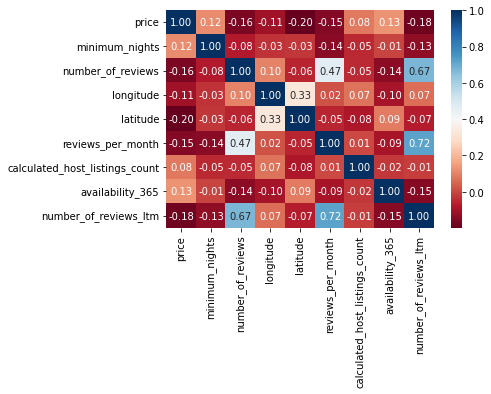

In [99]:
sns.heatmap(df_clean.corr(), cmap='RdBu', fmt='.2f', annot=True);

Por fim podemos plotar um gráfico para observarmos a relação entre a localização do imóvel e o preço.

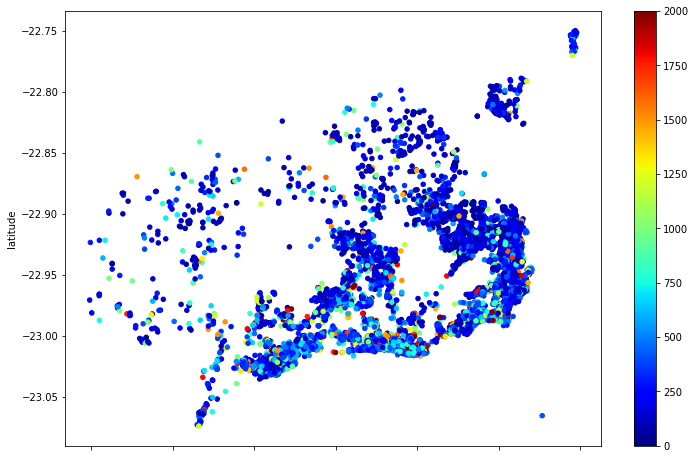

In [137]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=1, c=df_clean['price'],
              cmap=plt.get_cmap('jet'), figsize=(12,8));

É bastante evidente que grande parte dos imóveis se encontram proximos à praias, bem como os mesmos apresentam estar na faixa de valores acima de 500 reais.